In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
sns.set(style="white", color_codes=True)

In [2]:
train = pd.read_csv('logistic_news_train.txt')
test = pd.read_csv('logistic_news_test.txt')
#Now, we remove spaces present within column names for easier analysis
#train.columns = train.columns.str.replace(' ', '')
#test.columns = test.columns.str.replace(' ', '')
#train.head()

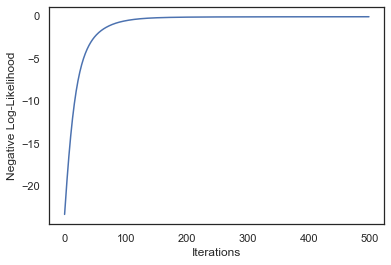

In [3]:
def softmax(logits: np.ndarray, n_cls: int):


    probs = np.array([np.empty([n_cls]) for i in range(logits.shape[0])])

    for i in range(logits.shape[0]):
        exp = np.exp(logits[i])
        denom = np.sum(exp)

        # logit scores to probability values
        probs[i] = exp / denom

    return probs
def linearPredict(X: np.ndarray, W: np.ndarray, biases: np.ndarray, n_cls: int):

    logits = W.dot(X.T).T

    return logits


def cross_entropy(probs: np.ndarray, y: np.ndarray, W:np.ndarray) -> float:

    n = probs.shape[0]

    L2 = np.sum(W ** 2 / (2*n))

    axis0 = np.arange(n)

    CELoss = np.log(probs[axis0, y.squeeze(-1)]).sum() + L2

    return CELoss / n

def gd(X: np.ndarray, y: np.ndarray, W: np.ndarray,
       biases: np.ndarray, lr: float, n_cls: int,
       iterations: int) -> (np.ndarray, np.ndarray, np.ndarray):

    n = len(y)

    L2 = np.sum(1 / n * W)


    axis0 = np.arange(X.shape[0])

    cost_history = np.zeros(iterations)

    for it in range(iterations):

        logitScores = linearPredict(X, W, biases, n_cls)
        probs = softmax(logitScores, n_cls)

        # error
        cost_history[it] = cross_entropy(probs, y, W)

        # compute error for probability of correct outcome
        probs[axis0, y.squeeze(-1)] -= 1

        # gradient of weights and biases
        gradsW = probs.T.dot(X) + L2
        gradsBiases = np.sum(probs, axis=0).reshape(-1, 1)

        # update weights
        W -= (lr * gradsW)

        # update biases
        biases -= (lr * gradsBiases)

    return W, biases, cost_history

### train
n_cls = 20
n_feats = train.shape[1] - 1
lr = 0.0001
iterations = 500

#  weight matrix
W = np.random.rand(n_cls, n_feats)
biases = np.random.rand(n_cls, 1)

# feature and label vectors
X = train.loc[:, :'X_train_2001'].to_numpy()
y = train.loc[:, 'Var2'].to_numpy().reshape(-1, 1)

# normalize images
scaler = StandardScaler()
X = scaler.fit_transform(X)

W, biases, costs = gd(X, y, W, biases, lr, n_cls, iterations)

# plot log likelihood as a function of the number of iterations
x = np.arange(iterations)

ax = sns.lineplot(x=x, y=costs, palette=['red'])
sns.color_palette()
#ax.set_palette("Reds")
#ax.set_title("")
ax.set_xlabel("Iterations")
ax.set_ylabel("Negative Log-Likelihood")
plt.show()

In [7]:
def predict(x_test, W, y, biases, n_cls):
    logit_scores = linearPredict(x_test, W, biases, n_cls)
    probs = softmax(logit_scores, n_cls)
    
    y_hat = np.argmax(probs, axis = 1).reshape(-1,1)
    accuracy = (y_hat == y).sum() / len(y) * 100
    
    return accuracy

# feature and label vectors
#X_test = test.loc[:, :'X_test_65'].to_numpy()
#y_test = test.loc[:, 'Var2'].to_numpy().reshape(-1, 1)

X_test = test.loc[:, :'X_test_2001'].to_numpy()
y_test = test.loc[:, 'Var2'].to_numpy().reshape(-1, 1)


X_test = scaler.transform(X_test)

acc = predict(X_test, W, y_test, biases, n_cls)

print(f"Digits accuracy: {acc:.2f}%")



Digits accuracy: 48.63%


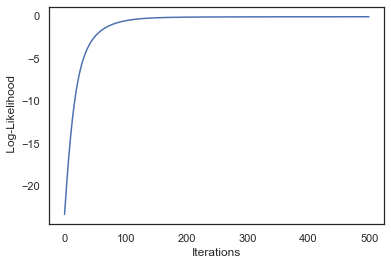

In [5]:
x = np.arange(iterations)

ax = sns.lineplot(x=x, y=costs, palette=['red'])
sns.color_palette()
#ax.set_palette("Reds")
#ax.set_title("")
ax.set_xlabel("Iterations")
ax.set_ylabel(" Log-Likelihood")
plt.show()